# Identify Characters from Product Images

I am using the fastai which is an open source library

You can refer the api doc here: https://docs.fast.ai/

Let's import the vision api of fastai

In [1]:
from fastai.vision import *

In [2]:
from fastai.callbacks import *

## Setting the data path

In [3]:
path = Path('data/product_characters')

In [60]:
path.ls()

[PosixPath('data/product_characters/submission_7.csv'),
 PosixPath('data/product_characters/test'),
 PosixPath('data/product_characters/train'),
 PosixPath('data/product_characters/.ipynb_checkpoints'),
 PosixPath('data/product_characters/models')]

Remove any images that can't be opened:

In [38]:
classes = ['angrybirds','bulbasaur','Chicken_little','donald_duck','han-solo','John Cena','mickey_mouse','pokemon','Roman Reigns','teenage_mutant','vegeta','Baloo','charizard','Cinderella','Godzilla','harry_potter','jojosiwa','minions','popeye','Scoopy Doo','Tom and Jerry','Winnie the poo','Bart simpson','Charlie brown','darth_vader','Goku_1','hellokitty','kakashi','naruto','power_rangers','SpongeBob SquarePants','toy_story_characters','ben','charmander','disney_princes','goofy','itachi','marilyn_monroe','pikachu','R2-D2','squirtle','vampirina']

In [39]:
for c in classes:
    print(c)
    verify_images(path/'train'/c, delete=True, max_size=1000)

## View data

In [5]:
tfms = get_transforms()

In [6]:
np.random.seed(42)
src = (ImageList.from_folder(path/'train')
       .split_by_rand_pct().label_from_folder())

In [63]:
data = src.transform(tfms, size=224).databunch(bs=16).normalize(imagenet_stats)

In [64]:
data.classes

['Baloo',
 'Bart simpson',
 'Charlie brown',
 'Chicken_little',
 'Cinderella',
 'Godzilla',
 'Goku_1',
 'John Cena',
 'R2-D2',
 'Roman Reigns',
 'Scoopy Doo',
 'SpongeBob SquarePants',
 'Tom and Jerry',
 'Winnie the poo',
 'angrybirds',
 'ben',
 'bulbasaur',
 'charizard',
 'charmander',
 'darth_vader',
 'disney_princes',
 'donald_duck',
 'goofy',
 'han-solo',
 'harry_potter',
 'hellokitty',
 'itachi',
 'jojosiwa',
 'kakashi',
 'marilyn_monroe',
 'mickey_mouse',
 'minions',
 'naruto',
 'pikachu',
 'pokemon',
 'popeye',
 'power_rangers',
 'squirtle',
 'teenage_mutant',
 'toy_story_characters',
 'vampirina',
 'vegeta']

In [65]:
len(data.classes)

42

Let's take a look at some of our pictures then.

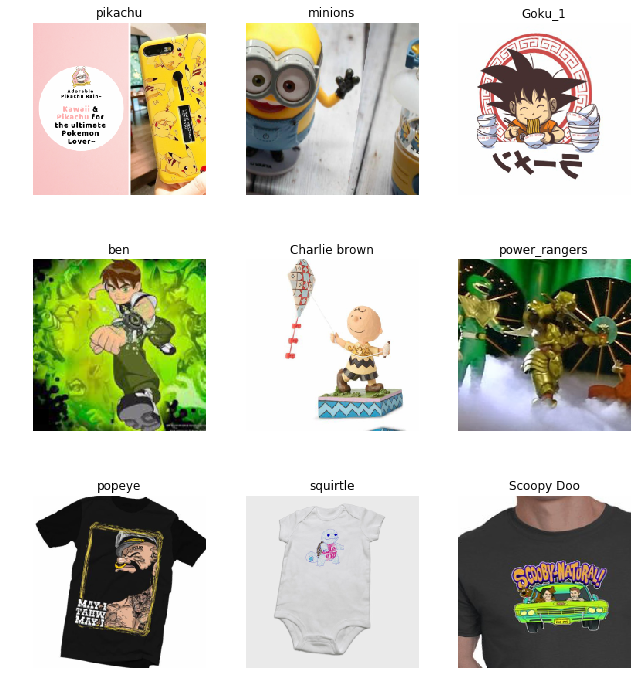

In [66]:
data.show_batch(rows=3, figsize=(9,10))

In [67]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['Baloo',
  'Bart simpson',
  'Charlie brown',
  'Chicken_little',
  'Cinderella',
  'Godzilla',
  'Goku_1',
  'John Cena',
  'R2-D2',
  'Roman Reigns',
  'Scoopy Doo',
  'SpongeBob SquarePants',
  'Tom and Jerry',
  'Winnie the poo',
  'angrybirds',
  'ben',
  'bulbasaur',
  'charizard',
  'charmander',
  'darth_vader',
  'disney_princes',
  'donald_duck',
  'goofy',
  'han-solo',
  'harry_potter',
  'hellokitty',
  'itachi',
  'jojosiwa',
  'kakashi',
  'marilyn_monroe',
  'mickey_mouse',
  'minions',
  'naruto',
  'pikachu',
  'pokemon',
  'popeye',
  'power_rangers',
  'squirtle',
  'teenage_mutant',
  'toy_story_characters',
  'vampirina',
  'vegeta'],
 42,
 8946,
 2236)

## Train model

In [76]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy])

In [69]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


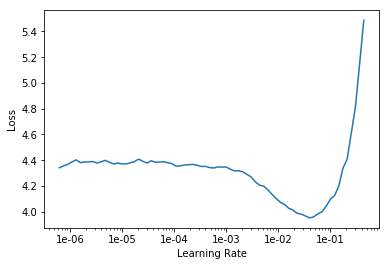

In [70]:
learn.recorder.plot()

In [71]:
lr = 7e-03

In [72]:
learn.fit_one_cycle(15, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='stage-1')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.082958,1.597317,0.425313,0.574687,01:34
1,1.659588,1.271819,0.354204,0.645796,01:35
2,1.521698,1.142686,0.309034,0.690966,01:36
3,1.398587,0.969899,0.259839,0.740161,01:36
4,1.232347,0.941031,0.260733,0.739267,01:36
5,1.098293,0.834712,0.233453,0.766547,01:36
6,0.970320,0.810106,0.224061,0.775939,01:36
7,0.834662,0.789264,0.211986,0.788014,01:36
8,0.771433,0.743393,0.207513,0.792487,01:36
9,0.637501,0.728414,0.191413,0.808587,01:36


Better model found at epoch 0 with accuracy value: 0.5746869444847107.
Better model found at epoch 1 with accuracy value: 0.6457960605621338.
Better model found at epoch 2 with accuracy value: 0.690966010093689.
Better model found at epoch 3 with accuracy value: 0.7401610016822815.
Better model found at epoch 5 with accuracy value: 0.7665473818778992.
Better model found at epoch 6 with accuracy value: 0.7759391665458679.
Better model found at epoch 7 with accuracy value: 0.78801429271698.
Better model found at epoch 8 with accuracy value: 0.7924866080284119.
Better model found at epoch 9 with accuracy value: 0.8085867762565613.
Better model found at epoch 11 with accuracy value: 0.8202146887779236.
Better model found at epoch 12 with accuracy value: 0.8246869444847107.


In [78]:
learn.load('stage-1');

In [95]:
learn.unfreeze()

In [74]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


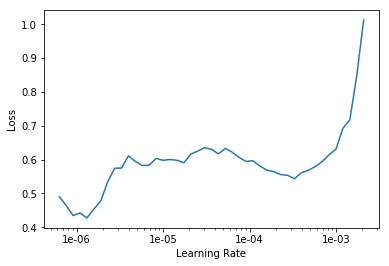

In [75]:
learn.recorder.plot()

In [76]:
learn.fit_one_cycle(5, slice(8e-08, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='stage-2')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.426272,0.646750,0.170841,0.829159,02:11
1,0.411278,0.633609,0.168605,0.831395,02:12
2,0.373174,0.622691,0.170841,0.829159,02:12
3,0.307410,0.614045,0.165921,0.834079,02:12
4,0.242544,0.604420,0.164580,0.835420,02:12


Better model found at epoch 0 with accuracy value: 0.8291592001914978.
Better model found at epoch 1 with accuracy value: 0.8313953280448914.
Better model found at epoch 3 with accuracy value: 0.8340787291526794.
Better model found at epoch 4 with accuracy value: 0.8354203701019287.


In [77]:
learn.fit_one_cycle(10, max_lr=slice(8e-08, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='stage-3')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.281343,0.619663,0.165027,0.834973,02:12
1,0.282960,0.621776,0.158766,0.841234,02:13
2,0.297964,0.641016,0.152057,0.847943,02:13
3,0.301630,0.631866,0.155635,0.844365,02:12
4,0.229248,0.650328,0.158318,0.841682,02:13
5,0.213125,0.661829,0.151163,0.848837,02:13
6,0.169657,0.645522,0.148032,0.851968,02:13
7,0.166480,0.639884,0.146691,0.853309,02:13
8,0.122408,0.640786,0.146243,0.853757,02:13
9,0.131671,0.630367,0.146243,0.853757,02:13


Better model found at epoch 0 with accuracy value: 0.834973156452179.
Better model found at epoch 1 with accuracy value: 0.8412343263626099.
Better model found at epoch 2 with accuracy value: 0.8479427695274353.
Better model found at epoch 5 with accuracy value: 0.8488371968269348.
Better model found at epoch 6 with accuracy value: 0.8519678115844727.
Better model found at epoch 7 with accuracy value: 0.8533094525337219.
Better model found at epoch 8 with accuracy value: 0.8537567257881165.


In [96]:
learn.load('stage-3');

In [97]:
learn.unfreeze()

In [98]:
learn.fit_one_cycle(10, max_lr=slice(8e-08, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='stage-4')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.115819,0.633340,0.146691,0.853309,02:11
1,0.139798,0.646032,0.150268,0.849732,02:12
2,0.202869,0.671122,0.150268,0.849732,02:13
3,0.158976,0.653636,0.146243,0.853757,02:13
4,0.161048,0.675408,0.151163,0.848837,02:13
5,0.114297,0.671488,0.142218,0.857782,02:13
6,0.103219,0.659251,0.139535,0.860465,02:13
7,0.094336,0.649051,0.137299,0.862701,02:13
8,0.070661,0.660521,0.138193,0.861807,02:13
9,0.076805,0.665637,0.139088,0.860912,02:13


Better model found at epoch 0 with accuracy value: 0.8533094525337219.
Better model found at epoch 3 with accuracy value: 0.8537567257881165.
Better model found at epoch 5 with accuracy value: 0.8577817678451538.
Better model found at epoch 6 with accuracy value: 0.8604651093482971.
Better model found at epoch 7 with accuracy value: 0.8627012372016907.


## Let's Resize the Data

In [41]:
np.random.seed(42)
data = src.transform(tfms, size=352).databunch(bs=8).normalize(imagenet_stats)

In [100]:
learn.load('stage-4');

In [146]:
learn.data = data

In [10]:
vc = pd.value_counts(data.train_ds.y.items, sort=False)

In [11]:
vc.index = data.classes; vc

Baloo                    193
Bart simpson             221
Charlie brown            111
Chicken_little           189
Cinderella                86
Godzilla                 218
Goku_1                   104
John Cena                 71
R2-D2                     81
Roman Reigns              78
Scoopy Doo                65
SpongeBob SquarePants    230
Tom and Jerry            232
Winnie the poo            84
angrybirds               149
ben                       92
bulbasaur                 83
charizard                 77
charmander                89
darth_vader              100
disney_princes            65
donald_duck              121
goofy                    190
han-solo                 120
harry_potter             196
hellokitty                94
itachi                    90
jojosiwa                 201
kakashi                   79
marilyn_monroe           104
mickey_mouse              84
minions                   82
naruto                    91
pikachu                   90
pokemon       

In [102]:
learn.freeze()

In [103]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


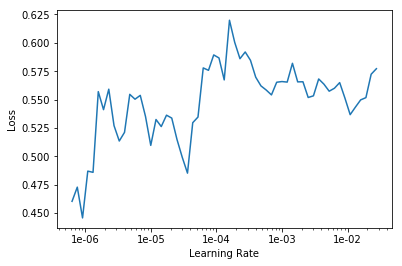

In [105]:
learn.recorder.plot()

In [12]:
lr = 1e-03

In [107]:
learn.fit_one_cycle(10, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='resize-stage-1')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.454137,0.529981,0.118068,0.881932,03:53
1,0.383151,0.484570,0.119410,0.880590,03:52
2,0.289522,0.489072,0.115385,0.884615,03:52
3,0.272037,0.467066,0.114937,0.885063,03:52
4,0.231748,0.451618,0.113596,0.886404,03:52
5,0.217512,0.474917,0.114490,0.885510,03:52
6,0.239682,0.466134,0.111360,0.888640,03:52
7,0.224664,0.457203,0.110465,0.889535,03:52
8,0.179404,0.462630,0.107782,0.892218,03:52
9,0.184397,0.459945,0.108229,0.891771,03:52


Better model found at epoch 0 with accuracy value: 0.8819320201873779.
Better model found at epoch 2 with accuracy value: 0.8846153616905212.
Better model found at epoch 3 with accuracy value: 0.8850626349449158.
Better model found at epoch 4 with accuracy value: 0.886404275894165.
Better model found at epoch 6 with accuracy value: 0.8886404037475586.
Better model found at epoch 7 with accuracy value: 0.8895348906517029.
Better model found at epoch 8 with accuracy value: 0.8922182321548462.


In [126]:
learn.load('resize-stage-1');

In [127]:
learn.unfreeze()

In [130]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


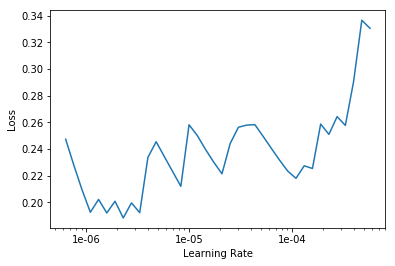

In [131]:
learn.recorder.plot()

In [132]:
learn.fit_one_cycle(10, slice(8e-07, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='unfreeze-resize-stage-1')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.191971,0.452818,0.106440,0.893560,05:22
1,0.245779,0.479896,0.120751,0.879249,05:24
2,0.203643,0.490035,0.117621,0.882379,05:24
3,0.180988,0.478387,0.116279,0.883721,05:24
4,0.203336,0.469112,0.114043,0.885957,05:24
5,0.181605,0.448544,0.110465,0.889535,05:24
6,0.152548,0.427362,0.102415,0.897585,05:24
7,0.139866,0.419626,0.101968,0.898032,05:24
8,0.105521,0.413871,0.099284,0.900716,05:24
9,0.149827,0.418483,0.093918,0.906082,05:24


Better model found at epoch 0 with accuracy value: 0.8935599327087402.
Better model found at epoch 6 with accuracy value: 0.8975849747657776.
Better model found at epoch 7 with accuracy value: 0.8980321884155273.
Better model found at epoch 8 with accuracy value: 0.9007155895233154.
Better model found at epoch 9 with accuracy value: 0.906082272529602.


In [43]:
learn.load('unfreeze-resize-stage-1');

In [44]:
learn.unfreeze()

In [45]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


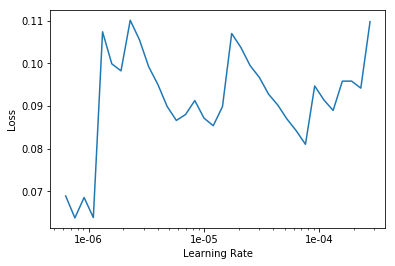

In [46]:
learn.recorder.plot()

In [47]:
learn.fit_one_cycle(15, slice(8e-07, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='unfreeze-resize-stage-2')])

epoch,train_loss,valid_loss,error_rate,accuracy,time


KeyboardInterrupt: 

## Let's tweak the transformation - zoom out

In [142]:
tfms = get_transforms(max_zoom=2); len(tfms)

2

In [129]:
def get_ex(): return data.train_ds[4][0]

def plots_f(rows, cols, width, height, **kwargs):
    [get_ex().apply_tfms(tfms[0], **kwargs).show(ax=ax) for i,ax in enumerate(plt.subplots(
        rows,cols,figsize=(width,height))[1].flatten())]

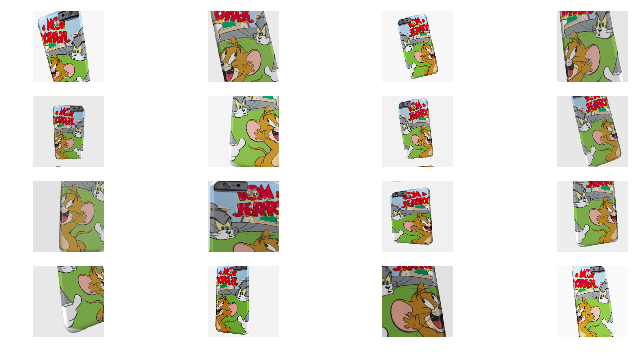

In [130]:
plots_f(4, 4, 12, 6, size=224)

In [143]:
data = src.transform(tfms, size=352).databunch(bs=16).normalize(imagenet_stats)

In [144]:
learn.load('stage-2-1');

In [145]:
learn.freeze()

In [146]:
learn.callback_fns.pop()

functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, name='stage-zoom-resize-1')

In [147]:
learn.callback_fns.append(partial(SaveModelCallback, name='stage-zoom-resize-1'))

In [148]:
learn.data = data

In [149]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


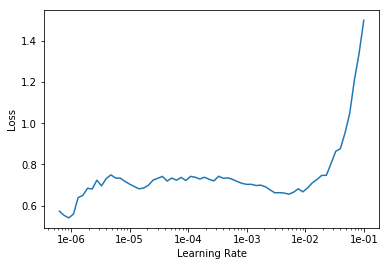

In [150]:
learn.recorder.plot()

In [152]:
lr = 5e-04

In [153]:
learn.fit_one_cycle(5, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.564052,0.647507,0.158683,0.841317,02:12
1,0.565493,0.590594,0.153443,0.846557,02:13
2,0.558817,0.563501,0.151946,0.848054,02:14
3,0.485657,0.569344,0.155689,0.844311,02:14
4,0.450714,0.558696,0.154940,0.845060,02:14


Better model found at epoch 0 with valid_loss value: 0.6475068926811218.
Better model found at epoch 1 with valid_loss value: 0.5905939340591431.
Better model found at epoch 2 with valid_loss value: 0.5635008215904236.
Better model found at epoch 4 with valid_loss value: 0.5586958527565002.


## Lets add mixup

In [57]:
data = src.transform(tfms, size=352).databunch(bs=8).normalize(imagenet_stats)

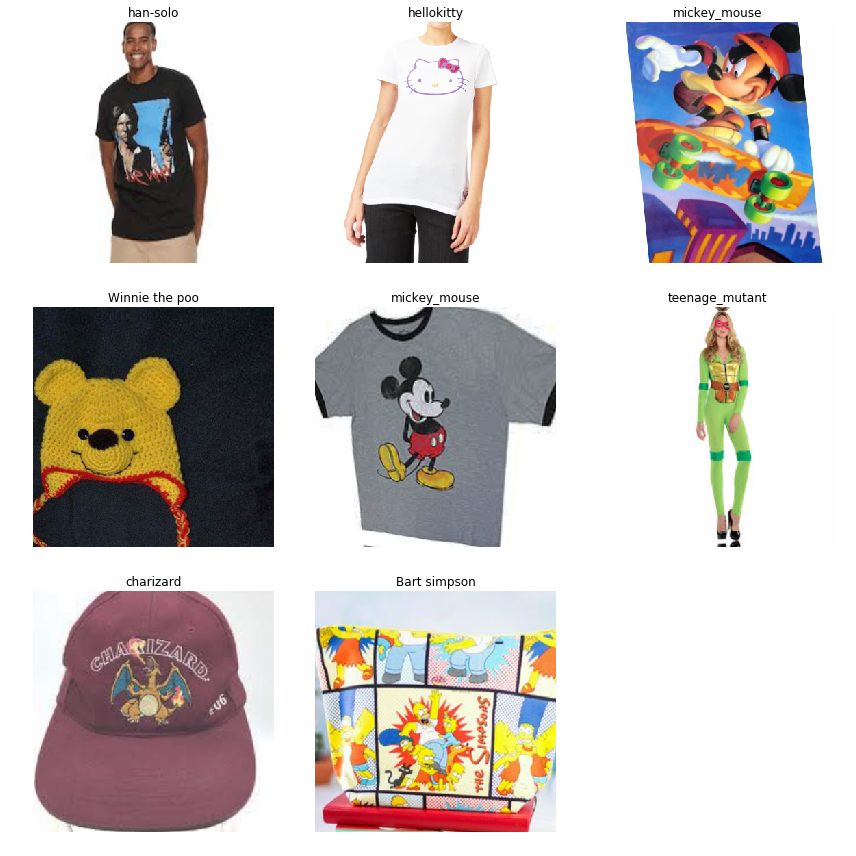

In [58]:
data.show_batch()

In [82]:
learn = cnn_learner(data, models.resnet50, metrics=[error_rate, accuracy]).mixup(alpha=0.1)

In [50]:
learn.load('unfreeze-resize-stage-1');

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


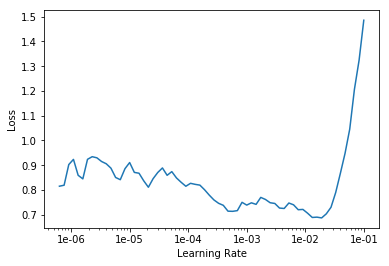

In [52]:
learn.recorder.plot()

In [53]:
lr = 3e-03

In [54]:
learn.fit(10, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='mixup-stage-1')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.782059,0.435111,0.115385,0.884615,03:51
1,0.830488,0.421161,0.110018,0.889982,03:52
2,0.766821,0.419741,0.111360,0.888640,03:52
3,0.763777,0.411904,0.108229,0.891771,03:52
4,0.696928,0.492607,0.115385,0.884615,03:52
5,0.685666,0.433537,0.120751,0.879249,03:52
6,0.614279,0.452846,0.123435,0.876565,03:52
7,0.718518,0.421658,0.109123,0.890877,03:52
8,0.692395,0.412329,0.110465,0.889535,03:52
9,0.643534,0.428220,0.110465,0.889535,03:52


Better model found at epoch 0 with accuracy value: 0.8846153616905212.
Better model found at epoch 1 with accuracy value: 0.8899821043014526.
Better model found at epoch 3 with accuracy value: 0.8917710185050964.


In [55]:
learn.fit(10, slice(lr), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='mixup-stage-2')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.681323,0.426042,0.117174,0.882826,03:52
1,0.699705,0.422234,0.105098,0.894902,03:52
2,0.699686,0.422556,0.116726,0.883274,03:52
3,0.691465,0.416266,0.112254,0.887746,03:52
4,0.723877,0.434750,0.116279,0.883721,03:52
5,0.668948,0.420113,0.109123,0.890877,03:52
6,0.703430,0.411056,0.104204,0.895796,03:52
7,0.654749,0.422523,0.114490,0.885510,03:52
8,0.697352,0.422697,0.116279,0.883721,03:52
9,0.654380,0.435274,0.110912,0.889088,03:52


Better model found at epoch 0 with accuracy value: 0.8828264474868774.
Better model found at epoch 1 with accuracy value: 0.8949016332626343.
Better model found at epoch 6 with accuracy value: 0.8957960605621338.


In [56]:
learn.unfreeze()

In [57]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


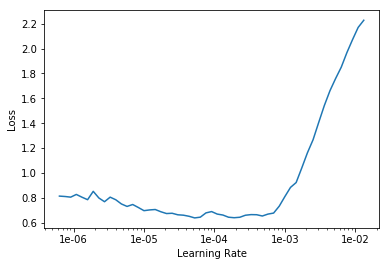

In [58]:
learn.recorder.plot()

In [59]:
learn.fit(10, slice(1e-05, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='unfreeze-mixup-stage-1')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.191997,0.658262,0.162791,0.837209,05:23
1,0.947771,0.561108,0.149374,0.850626,05:23
2,0.844121,0.512550,0.131485,0.868515,05:23
3,0.925977,0.460486,0.118515,0.881485,05:23
4,0.766604,0.434223,0.110912,0.889088,05:23
5,0.749355,0.453764,0.123435,0.876565,05:23
6,0.684819,0.417606,0.111807,0.888193,05:23
7,0.708153,0.452830,0.116726,0.883274,05:23
8,0.661051,0.421151,0.110465,0.889535,05:23
9,0.681558,0.437201,0.115385,0.884615,05:23


Better model found at epoch 0 with accuracy value: 0.8372092843055725.
Better model found at epoch 1 with accuracy value: 0.8506261110305786.
Better model found at epoch 2 with accuracy value: 0.8685151934623718.
Better model found at epoch 3 with accuracy value: 0.8814848065376282.
Better model found at epoch 4 with accuracy value: 0.8890876770019531.
Better model found at epoch 8 with accuracy value: 0.8895348906517029.


In [60]:
learn.fit(10, slice(1e-05, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='unfreeze-mixup-stage-2')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.564954,0.394041,0.100626,0.899374,05:23
1,0.590591,0.446159,0.109123,0.890877,05:23
2,0.538354,0.377277,0.095707,0.904293,05:23
3,0.558802,0.403837,0.102862,0.897138,05:23
4,0.548369,0.416342,0.095707,0.904293,05:23
5,0.597184,0.408844,0.104204,0.895796,05:23
6,0.516792,0.405541,0.102415,0.897585,05:23
7,0.510655,0.390618,0.093023,0.906977,05:23
8,0.582938,0.408792,0.101968,0.898032,05:23
9,0.449701,0.399464,0.096154,0.903846,05:23


Better model found at epoch 0 with accuracy value: 0.8993738889694214.
Better model found at epoch 2 with accuracy value: 0.9042933583259583.
Better model found at epoch 7 with accuracy value: 0.9069767594337463.


In [88]:
learn.load('unfreeze-mixup-stage-2');

In [89]:
learn.unfreeze()

In [85]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


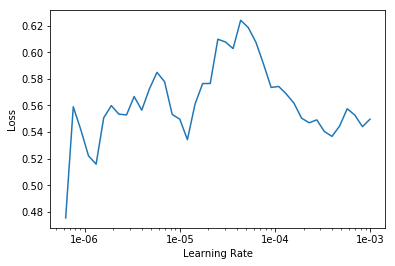

In [86]:
learn.recorder.plot()

In [ ]:
learn.fit(5, slice(1e-05, lr/5), callbacks=[SaveModelCallback(learn, monitor='accuracy', name='unfreeze-mixup-stage-3')])

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.517219,0.391352,0.097048,0.902952,05:23
1,0.510286,0.392572,0.102415,0.897585,05:23
2,0.509250,0.374696,0.093470,0.906530,05:23
3,0.552536,0.396081,0.092129,0.907871,05:23


Better model found at epoch 0 with accuracy value: 0.902951717376709.
Better model found at epoch 2 with accuracy value: 0.9065295457839966.
Better model found at epoch 3 with accuracy value: 0.9078711867332458.


## Try with Resnet-101

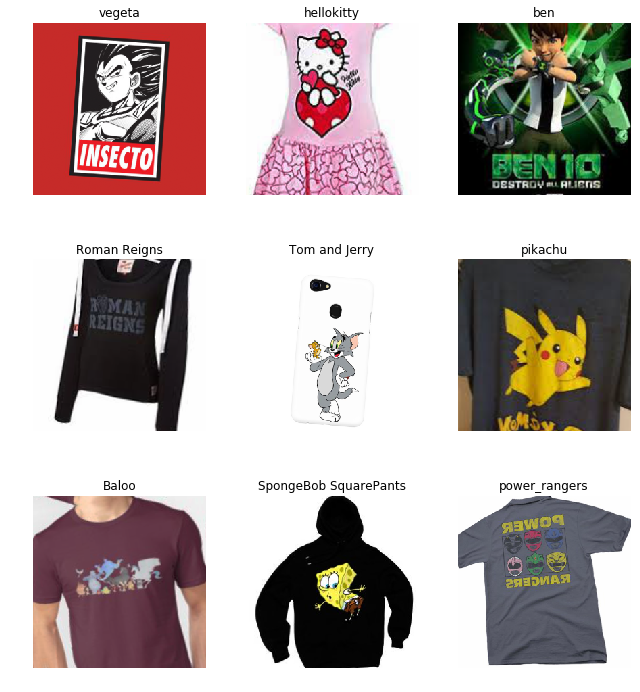

In [23]:
data.show_batch(rows=3, figsize=(9,10))

In [7]:
data = src.transform(tfms, size=256).databunch(bs=16).normalize(imagenet_stats)

In [44]:
learn = cnn_learner(data, models.resnet101, metrics=[error_rate, accuracy]).mixup(alpha=0.1)

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


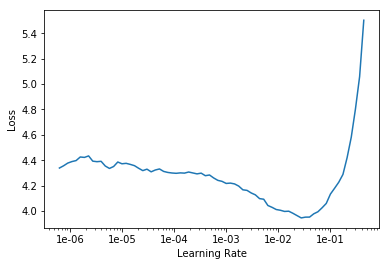

In [29]:
learn.recorder.plot()

In [30]:
learn.callback_fns.append(partial(SaveModelCallback, name='stage-101-1'))

In [32]:
lr = 4e-03

In [33]:
learn.fit(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,2.002450,1.320459,0.367515,0.632485,01:50
1,1.700760,1.078092,0.307635,0.692365,01:51
2,1.438918,0.936280,0.273952,0.726048,01:51
3,1.395786,0.941775,0.266467,0.733533,01:51
4,1.224047,0.839956,0.241018,0.758982,01:51
5,1.121191,0.819537,0.239521,0.760479,01:52
6,1.066683,0.791502,0.223802,0.776198,01:51
7,1.067693,0.759974,0.211078,0.788922,01:51
8,1.020944,0.745486,0.202844,0.797156,01:51
9,0.970440,0.769354,0.214072,0.785928,01:51


Better model found at epoch 0 with valid_loss value: 1.320459008216858.
Better model found at epoch 1 with valid_loss value: 1.0780915021896362.
Better model found at epoch 2 with valid_loss value: 0.9362799525260925.
Better model found at epoch 4 with valid_loss value: 0.8399555683135986.
Better model found at epoch 5 with valid_loss value: 0.8195371627807617.
Better model found at epoch 6 with valid_loss value: 0.7915024161338806.
Better model found at epoch 7 with valid_loss value: 0.7599743604660034.
Better model found at epoch 8 with valid_loss value: 0.745486319065094.


In [34]:
learn.callback_fns.pop();learn.callback_fns.append(partial(SaveModelCallback, name='stage-101-2'))

In [35]:
learn.fit(10, slice(lr))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.966802,0.761448,0.223802,0.776198,01:51
1,0.980924,0.751146,0.217814,0.782186,01:52
2,0.925230,0.760410,0.205838,0.794162,01:51
3,0.890122,0.739627,0.207335,0.792665,01:51
4,0.909705,0.698180,0.187126,0.812874,01:51
5,0.804308,0.716370,0.206587,0.793413,01:52
6,0.833327,0.721176,0.193862,0.806138,01:51
7,0.859930,0.730462,0.202096,0.797904,01:52
8,0.829380,0.709168,0.193114,0.806886,01:51
9,0.832226,0.743817,0.205838,0.794162,01:51


Better model found at epoch 0 with valid_loss value: 0.7614478468894958.
Better model found at epoch 1 with valid_loss value: 0.7511462569236755.
Better model found at epoch 3 with valid_loss value: 0.739627480506897.
Better model found at epoch 4 with valid_loss value: 0.6981802582740784.


In [45]:
learn.load('stage-101-2');

In [46]:
learn.unfreeze()

In [47]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


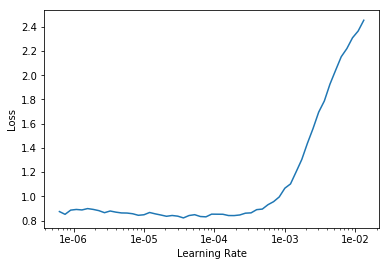

In [39]:
learn.recorder.plot()

In [49]:
learn.callback_fns

[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False),
 functools.partial(<class 'fastai.callbacks.mixup.MixUpCallback'>, alpha=0.1, stack_x=False, stack_y=True),
 functools.partial(<class 'fastai.callbacks.tracker.SaveModelCallback'>, name='stage-101-3')]

In [48]:
learn.callback_fns.append(partial(SaveModelCallback, name='stage-101-3'))

In [50]:
learn.fit(10, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.848927,0.722131,0.202844,0.797156,02:30
1,0.819321,0.718410,0.188623,0.811377,02:30
2,0.741971,0.688462,0.186377,0.813623,02:30
3,0.693901,0.656264,0.175150,0.824850,02:30
4,0.662888,0.655756,0.171407,0.828593,02:30
5,0.629461,0.647842,0.171407,0.828593,02:30
6,0.636961,0.647942,0.162425,0.837575,02:30
7,0.559437,0.633014,0.167665,0.832335,02:30
8,0.578835,0.640816,0.168413,0.831587,02:30
9,0.548691,0.629121,0.171407,0.828593,02:30


Better model found at epoch 0 with valid_loss value: 0.7221312522888184.
Better model found at epoch 1 with valid_loss value: 0.7184104919433594.
Better model found at epoch 2 with valid_loss value: 0.6884621381759644.
Better model found at epoch 3 with valid_loss value: 0.6562641263008118.
Better model found at epoch 4 with valid_loss value: 0.6557555794715881.
Better model found at epoch 5 with valid_loss value: 0.6478420495986938.
Better model found at epoch 7 with valid_loss value: 0.633014440536499.
Better model found at epoch 9 with valid_loss value: 0.6291205286979675.


In [51]:
learn.callback_fns.pop(); learn.callback_fns.append(partial(SaveModelCallback, name='stage-101-4'))

In [ ]:
learn.fit(10, slice(1e-6, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time


In [118]:
learn.callback_fns.pop(); learn.callback_fns.append(partial(SaveModelCallback, name='stage-101-4'))

In [119]:
learn.fit(10, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,1.113899,0.622265,0.160928,0.839072,02:35
1,1.092546,0.610120,0.164671,0.835329,02:35
2,1.032923,0.575728,0.150449,0.849551,02:35
3,1.008247,0.595369,0.154940,0.845060,02:34
4,1.081646,0.617747,0.155689,0.844311,02:35
5,1.058669,0.620268,0.160180,0.839820,02:35
6,1.005534,0.573278,0.143713,0.856287,02:34
7,1.038365,0.550436,0.135479,0.864521,02:35
8,0.991519,0.601926,0.152695,0.847305,02:34
9,0.988243,0.584254,0.143713,0.856287,02:34


Better model found at epoch 0 with valid_loss value: 0.6222652792930603.
Better model found at epoch 1 with valid_loss value: 0.6101198196411133.
Better model found at epoch 2 with valid_loss value: 0.5757282972335815.
Better model found at epoch 6 with valid_loss value: 0.5732781887054443.
Better model found at epoch 7 with valid_loss value: 0.5504356026649475.


In [120]:
learn.callback_fns.pop(); learn.callback_fns.append(partial(SaveModelCallback, name='stage-101-4'))

In [121]:
learn.fit(10, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.997071,0.622322,0.158683,0.841317,02:34
1,0.984720,0.632150,0.153443,0.846557,02:35
2,0.978621,0.612617,0.153443,0.846557,02:35
3,0.979689,0.621200,0.155689,0.844311,02:35
4,0.938069,0.609599,0.154940,0.845060,02:35
5,0.942293,0.645578,0.162425,0.837575,02:34
6,0.961326,0.629855,0.152695,0.847305,02:34
7,0.971749,0.613664,0.148204,0.851796,02:34
8,0.930489,0.601341,0.149701,0.850299,02:35
9,0.953594,0.625963,0.147455,0.852545,02:34


Better model found at epoch 0 with valid_loss value: 0.6223223805427551.
Better model found at epoch 2 with valid_loss value: 0.6126165986061096.
Better model found at epoch 4 with valid_loss value: 0.6095987558364868.
Better model found at epoch 8 with valid_loss value: 0.6013409495353699.


In [125]:
learn.fit(10, slice(1e-5, lr/5))

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.908816,0.599084,0.147455,0.852545,02:30
1,0.951484,0.612006,0.160180,0.839820,02:34
2,0.948991,0.566035,0.153443,0.846557,02:34
3,0.941994,0.614840,0.155689,0.844311,02:35
4,0.936878,0.624714,0.143713,0.856287,02:34
5,0.926445,0.621649,0.158683,0.841317,02:34
6,0.903073,0.629096,0.159431,0.840569,02:34
7,0.935398,0.589319,0.146707,0.853293,02:34
8,0.896689,0.652121,0.160928,0.839072,02:34
9,0.913404,0.628885,0.154192,0.845808,02:34


Better model found at epoch 0 with valid_loss value: 0.5990841388702393.
Better model found at epoch 2 with valid_loss value: 0.566035270690918.


In [10]:
learn.callback_fns

[functools.partial(<class 'fastai.basic_train.Recorder'>, add_time=True, silent=False),
 functools.partial(<class 'fastai.callbacks.mixup.MixUpCallback'>, alpha=0.4, stack_x=False, stack_y=True)]

## Data Augmentation

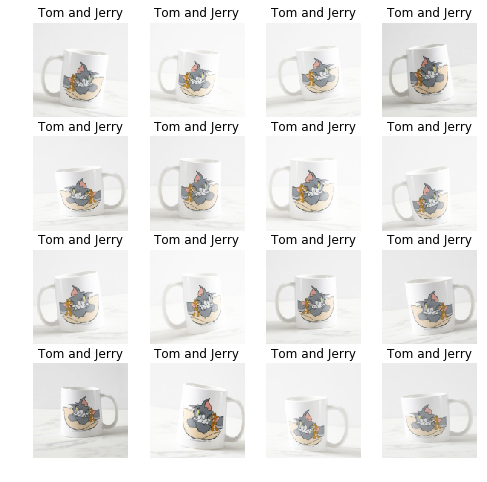

In [34]:
def _plot(i,j,ax):
    x,y = data.train_ds[3]
    x.show(ax, y=y)

plot_multi(_plot, 4, 4, figsize=(8,8))

## Interpretation

In [61]:
learn.load('unfreeze-mixup-stage-2');

In [62]:
learn.validate()

[0.39061818, tensor(0.0930), tensor(0.9070)]

In [43]:
doc(learn.validate)

validate [source] [test] validate ( dl = None , callbacks = None , metrics = None ) 
 
 × Tests found for validate : pytest -sv tests/test_collab_train.py::test_val_loss [source] pytest -sv tests/test_text_train.py::test_val_loss [source] To run tests please refer to this guide . Validate on dl with potential callbacks and metrics . 
 Show in docs

In [63]:
interp = ClassificationInterpretation.from_learner(learn)

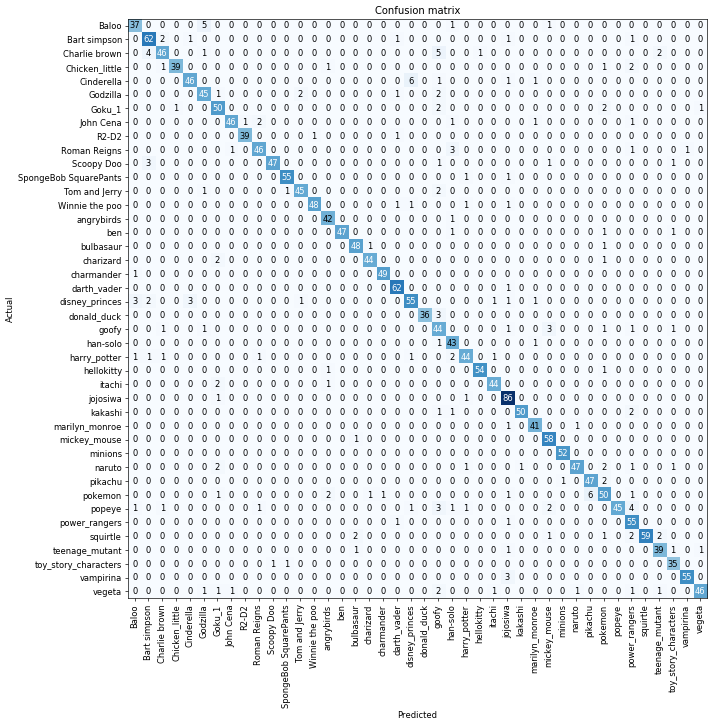

In [64]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [65]:
interp.most_confused(min_val=2)

[('Cinderella', 'disney_princes', 6),
 ('pokemon', 'pikachu', 6),
 ('Baloo', 'Godzilla', 5),
 ('Charlie brown', 'goofy', 5),
 ('Charlie brown', 'Bart simpson', 4),
 ('popeye', 'power_rangers', 4),
 ('Roman Reigns', 'han-solo', 3),
 ('Scoopy Doo', 'Bart simpson', 3),
 ('disney_princes', 'Baloo', 3),
 ('disney_princes', 'Cinderella', 3),
 ('donald_duck', 'goofy', 3),
 ('goofy', 'mickey_mouse', 3),
 ('popeye', 'goofy', 3),
 ('vampirina', 'jojosiwa', 3),
 ('Bart simpson', 'Charlie brown', 2),
 ('Charlie brown', 'teenage_mutant', 2),
 ('Chicken_little', 'power_rangers', 2),
 ('Godzilla', 'Tom and Jerry', 2),
 ('Godzilla', 'goofy', 2),
 ('Goku_1', 'goofy', 2),
 ('Goku_1', 'pokemon', 2),
 ('John Cena', 'Roman Reigns', 2),
 ('Tom and Jerry', 'goofy', 2),
 ('charizard', 'Goku_1', 2),
 ('disney_princes', 'Bart simpson', 2),
 ('harry_potter', 'han-solo', 2),
 ('itachi', 'Goku_1', 2),
 ('kakashi', 'power_rangers', 2),
 ('naruto', 'Goku_1', 2),
 ('naruto', 'pokemon', 2),
 ('pikachu', 'pokemon', 2),

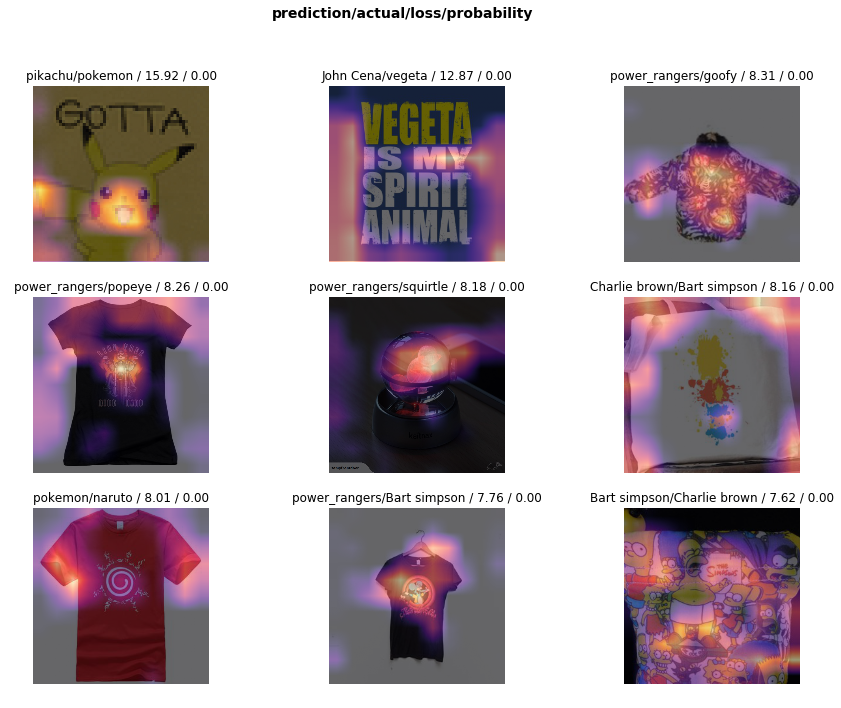

In [66]:
interp.plot_top_losses(9, figsize=(15,11))

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

In [36]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

In [37]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

In [38]:
ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

In [84]:
ds, idxs = DatasetFormatter().from_similars(learn, ds_type=DatasetType.Valid)

Getting activations...


Computing similarities...


In [85]:
ImageCleaner(ds, idxs, path, duplicates=True)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

## Prediction on Test Data

In [64]:
learn.data.train_ds

LabelList (5348 items)
x: ImageList
Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256),Image (3, 256, 256)
y: CategoryList
Tom and Jerry,Tom and Jerry,Tom and Jerry,Tom and Jerry,Tom and Jerry
Path: data/product_characters/train

In [67]:
learn.export()

In [66]:
Path(path/'train').ls()

[PosixPath('data/product_characters/train/Tom and Jerry'),
 PosixPath('data/product_characters/train/Charlie brown'),
 PosixPath('data/product_characters/train/vampirina'),
 PosixPath('data/product_characters/train/angrybirds'),
 PosixPath('data/product_characters/train/popeye'),
 PosixPath('data/product_characters/train/naruto'),
 PosixPath('data/product_characters/train/goofy'),
 PosixPath('data/product_characters/train/backup_models'),
 PosixPath('data/product_characters/train/Baloo'),
 PosixPath('data/product_characters/train/Winnie the poo'),
 PosixPath('data/product_characters/train/charmander'),
 PosixPath('data/product_characters/train/teenage_mutant'),
 PosixPath('data/product_characters/train/pokemon'),
 PosixPath('data/product_characters/train/minions'),
 PosixPath('data/product_characters/train/disney_princes'),
 PosixPath('data/product_characters/train/han-solo'),
 PosixPath('data/product_characters/train/ben'),
 PosixPath('data/product_characters/train/jojosiwa'),
 PosixP

In [68]:
learn = load_learner(path/'train', test=ImageList.from_folder(path/'test'))

In [118]:
learn.data.test_ds

LabelList (3727 items)
x: ImageList
Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352),Image (3, 352, 352)
y: EmptyLabelList
,,,,
Path: data/product_characters/train

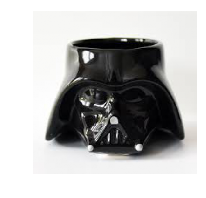

In [119]:
show_image(learn.data.test_ds[0][0])

In [69]:
preds, y = learn.get_preds(ds_type=DatasetType.Test)

In [70]:
label_preds = np.argmax(preds, axis=1)

In [71]:
label_preds

tensor([19,  6,  8,  ..., 36, 30,  3])

In [72]:
label_preds_classes = [data.classes[pred] for pred in label_preds]

In [73]:
label_preds_classes[0]

'darth_vader'

In [125]:
learn.data.train_ds[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [74]:
submission = pd.DataFrame({'Filename': os.listdir(f'{path}/test'), 'Prediction': label_preds_classes})

In [75]:
submission.to_csv(path/'submission_12.csv', index=False)

## Addressing data lack for characters

In [11]:
import os
character_list_200 = [(p, len(p.ls())) for p in Path(path/'train').ls() if not os.path.isfile(p) and len(p.ls()) < 200]

In [12]:
character_list_200

[]

In [13]:
character_list = [(p, len(p.ls())) for p in Path(path/'train').ls() if not os.path.isfile(p) and len(p.ls()) >= 200]

In [14]:
character_list

[(PosixPath('data/product_characters/train/Tom and Jerry'), 249),
 (PosixPath('data/product_characters/train/Charlie brown'), 247),
 (PosixPath('data/product_characters/train/vampirina'), 266),
 (PosixPath('data/product_characters/train/angrybirds'), 270),
 (PosixPath('data/product_characters/train/popeye'), 264),
 (PosixPath('data/product_characters/train/naruto'), 277),
 (PosixPath('data/product_characters/train/goofy'), 246),
 (PosixPath('data/product_characters/train/Baloo'), 242),
 (PosixPath('data/product_characters/train/Winnie the poo'), 260),
 (PosixPath('data/product_characters/train/charmander'), 230),
 (PosixPath('data/product_characters/train/teenage_mutant'), 261),
 (PosixPath('data/product_characters/train/pokemon'), 267),
 (PosixPath('data/product_characters/train/minions'), 257),
 (PosixPath('data/product_characters/train/disney_princes'), 340),
 (PosixPath('data/product_characters/train/han-solo'), 215),
 (PosixPath('data/product_characters/train/ben'), 211),
 (PosixP

In [9]:
google_image_directory = path/'google_images'

In [11]:
for file in Path(path/'google_image_urls').ls():
    if os.path.isfile(file):
        fname = os.path.basename(file).split('_urls.txt')[0]
        dest = google_image_directory/fname
        if not os.path.exists(dest):
            os.mkdir(dest)
            download_images(file, dest, max_pics=1000)

SystemExit: 1

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3275: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [12]:
# download_images(path/'google_image_urls'/'roman_reigns_urls.txt', google_image_directory/'Roman Reigns', max_pics=200)

In [24]:
Path(path/'google_image_urls').ls()

[PosixPath('data/product_characters/google_image_urls/roman_reigns_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/ben_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/cinderella_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/r2_d2_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/angrybirds_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/minions_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/charizard_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/hello_kitty_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/donald_duck_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/han_solo_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/charmander_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/bulbasaur_urls.txt'),
 PosixPath('data/product_characters/google_image_urls/goku_urls.txt'),
 PosixPath('data/pro

In [13]:
path

PosixPath('data/product_characters')

In [43]:
import shutil, random, os
for dirpath, count in character_list_200:
    dirname = os.path.basename(dirpath)
    dirpath = path/'google_images'/dirname
    if os.path.exists(dirpath):
        destPath = path/'train'/dirname
        filenames = random.sample(os.listdir(dirpath), 150)
        for fname in filenames:
            srcpath = os.path.join(dirpath, fname)
#             print(fname)
            shutil.copyfile(srcpath, destPath/fname)

In [59]:
for directory in Path(path/'train').ls():
    if os.path.isdir(directory) and 'models' not in str(directory):
        filenames = [f for f in random.sample(os.listdir(directory), 70) if 'Cax_train' in f]
        folder = str(directory).split('/')[-1]
        if os.path.exists(path/'valid'/folder):
            shutil.rmtree(path/'valid'/folder)


In [60]:
for directory in Path(path/'train').ls():
    if os.path.isdir(directory) and 'models' not in str(directory):
        filenames = [f for f in random.sample(os.listdir(directory), 70) if 'Cax_train' in f]
        folder = str(directory).split('/')[-1]
        if not os.path.exists(path/'valid'/folder):
#             print(path)
#             print(path/'valid'/folder)
            os.mkdir(path/'valid'/folder)
        for filename in filenames:
            srcpath = os.path.join(path/'train'/folder, filename)
            destpath = os.path.join(path/'valid'/folder, filename)
#             print(srcpath, destpath)
            shutil.move(srcpath, destpath)
        

In [13]:
for directory in Path(path/'valid').ls():
    if os.path.isdir(directory):
        folder = str(directory).split('/')[-1]
        for filename in os.listdir(directory):
            srcpath = os.path.join(path/'valid'/folder, filename)
            destpath = os.path.join(path/'train'/folder, filename)
            shutil.move(srcpath, destpath)

In [131]:
path

PosixPath('data/product_characters')

In [180]:
def get_average_width_height(path):
    sum_height = 0
    sum_width = 0
    count = 0
    width_list = []
    height_list = []
    for folder in Path(path).ls():
        if os.path.isdir(folder):
            for f in folder.ls():
                try:
                    count += 1
                    im = Image.open(f)
                    width, height = im.size
                    width_list.append(width)
                    height_list.append(height)
                    sum_height += height
                    sum_width += width
                except Exception:
                    pass
    return sum_width/count, sum_height/count, min(width_list), min(height_list)

In [181]:
get_average_width_height(path/'train')

(335.6906044284859, 339.1730999401556, 75, 75)

In [182]:
get_average_width_height(path/'google_images')

/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 382490713 bytes but only got 0. Skipping tag 0
  " Skipping tag %s" % (size, len(data), tag))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 1277952012 bytes but only got 0. Skipping tag 60876
  " Skipping tag %s" % (size, len(data), tag))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7864480 bytes but only got 0. Skipping tag 5
  " Skipping tag %s" % (size, len(data), tag))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly corrupt EXIF data.  Expecting to read 285278993 bytes but only got 0. Skipping tag 290
  " Skipping tag %s" % (size, len(data), tag))
/opt/anaconda3/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:754: UserWarning: Possibly co

(713.0353594881293, 725.4881293146994, 71, 71)